# Plotting Helpers 

In [10]:
from plot_helpers import plot_helper, plot_seperatly
%run "./workflow.ipynb"

No meaningful growth found for this group: A11
No meaningful growth found for this group: A2
No meaningful growth found for this group: B11
No meaningful growth found for this group: B2
No meaningful growth found for this group: B4
No meaningful growth found for this group: B9
No meaningful growth found for this group: C11
No meaningful growth found for this group: C2
No meaningful growth found for this group: D11
No meaningful growth found for this group: D2


Grouping By Biological Replicate. You can manually change the things to group by, qualities you want to retain. 

In [11]:
group =["bio rep"]
by_bio_rep = (with_mu.groupby(group+["time_hours"], as_index=False)
    .agg(
        strain =("strain", "first"),
        od_mean=("od", "mean"),
        od_std=("od_smooth", "std"),
        mu_mean=("mu", "mean"),
        mu_std=("mu", "std"),
        n=("od_smooth", "size"),
    )
)
by_bio_rep.head()

,bio rep,time_hours,strain,od_mean,od_std,mu_mean,mu_std,n
0,88,0.234444,WT,0.087250,0.000077,3.409632,0.623988,8
1,88,0.484444,WT,0.087375,0.000103,3.111199,0.427546,8
2,88,0.734444,WT,0.087500,0.000119,2.934066,0.315322,8
3,88,0.984444,WT,0.087500,0.000156,2.791380,0.232578,8
4,88,1.234444,WT,0.088500,0.000197,2.682710,0.176026,8


If you want to further group by condition, you can, but it's important to first group by bio rep and only then by condition -- to give each bio rep an equal weight even if the number of wells is not equal (let's say you removed some)

In [12]:
group2 =["strain"]
by_strain = (with_mu.groupby(group2+["time_hours"], as_index=False)
    .agg(
        od_mean=("od", "mean"),
        od_std=("od_smooth", "std"),
        mu_mean=("mu", "mean"),
        mu_std=("mu", "std"),
        n=("od_smooth", "size"),
    )
)

`plot_helper`

This function helps you plot multiple lines on the same plot. can work for aggregated or non aggregated data (by well, by bio rep or condition). 

you need to specify:

`df`: the data frame you want to draw from. If you want to pick individual wells or individual bio reps instead of all, you will need your `df` to be masked as shown in the example.  

`plot_by` = what group are you plotting (individual wells, strain, bio rep..)

`color_by` = each of them will get its own color (like by strain...)

`x_col` = what column you want to use as the x axis (eg. time_hours)

`y_col` =what column you want to use as the x axis (eg. od_smooth)

`x_label` = the label written out

`y_label` = the label written out

`title` = title for the plot

`font_size` = defaults to 14




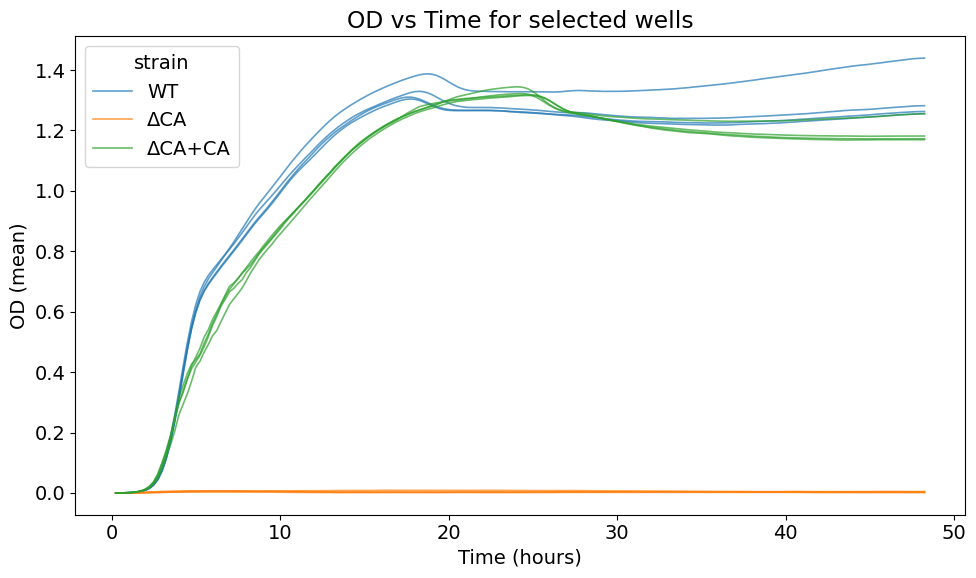

In [13]:
wells_to_plot = ["A1","A2", "A3", "B1", "B2", "B3", "C1", "C2", "C3", "D1", "D2", "D3"]
mask = with_mu["well"].isin(wells_to_plot)

df = with_mu[mask]
plot_by = "well"
color_by = "strain"
x_col = "time_hours"
y_col = "od_smooth"
x_label = "Time (hours)"
y_label = "OD (mean)"
title = "OD vs Time for selected wells"
plot_helper(plot_by=plot_by, color_by=color_by, df=df, x_col=x_col, y_col=y_col, x_label=x_label, y_label=y_label, title= title)

`plot_seperatatly`

plots each condition on a different axis. 

Same parameters as `plot_helper` , only title will contain `title` followed by the specific condition being plotted (the current `plot_by`)

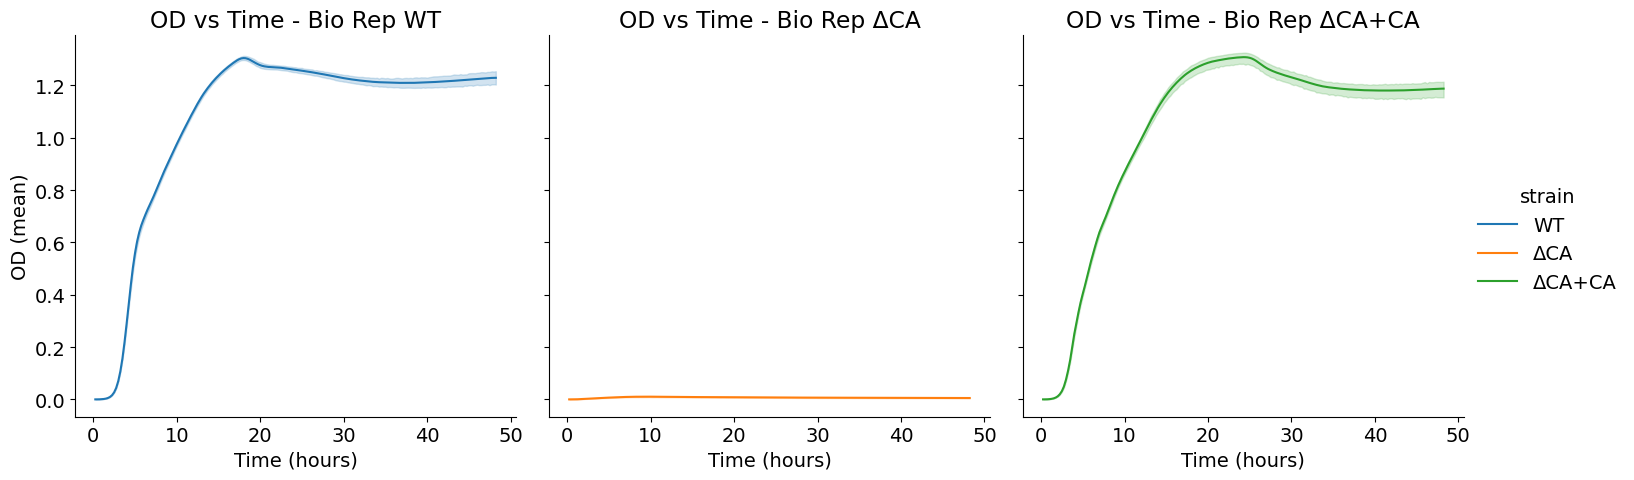

In [28]:
plot_by = "strain"
color_by = "strain"
df = with_mu
y_col = "od_smooth"
x_col = "time_hours"
x_label = "Time (hours)"
y_label = "OD (mean)"
title = "OD vs Time - Bio Rep "
log = False
plot_seperatly(df=df, plot_by=plot_by, color_by=color_by, x_col=x_col, y_col=y_col, x_label=x_label, y_label=y_label, title= title, log=log)

# Plotting Examples

You can use the helpers above to create many plots. However, here are more examples 

## Individual Wells

0.09


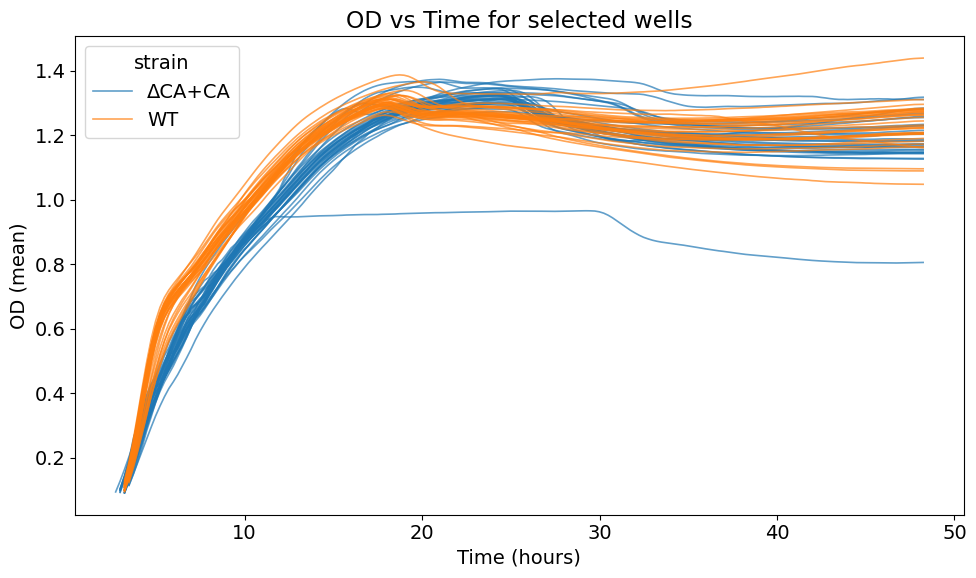

In [25]:
# Change wells to your choice
#wells_to_plot = ["A1","A2", "A3", "B1", "B2", "B3", "C1", "C2", "C3", "D1", "D2", "D3"]
threshold_od = 0.09 # Set your OD threshold if you want one
mask = with_mu["od_smooth"] > threshold_od

print(threshold_od)
df = with_mu[mask]
plot_by = "well"
color_by = "strain"
x_col = "time_hours"
y_col = "od_smooth"
x_label = "Time (hours)"
y_label = "OD (mean)"
title = "OD vs Time for selected wells"
log = False
plot_helper(plot_by=plot_by,color_by=color_by, df=df, x_col=x_col, y_col=y_col, x_label=x_label, y_label=y_label, title= title, log=log)

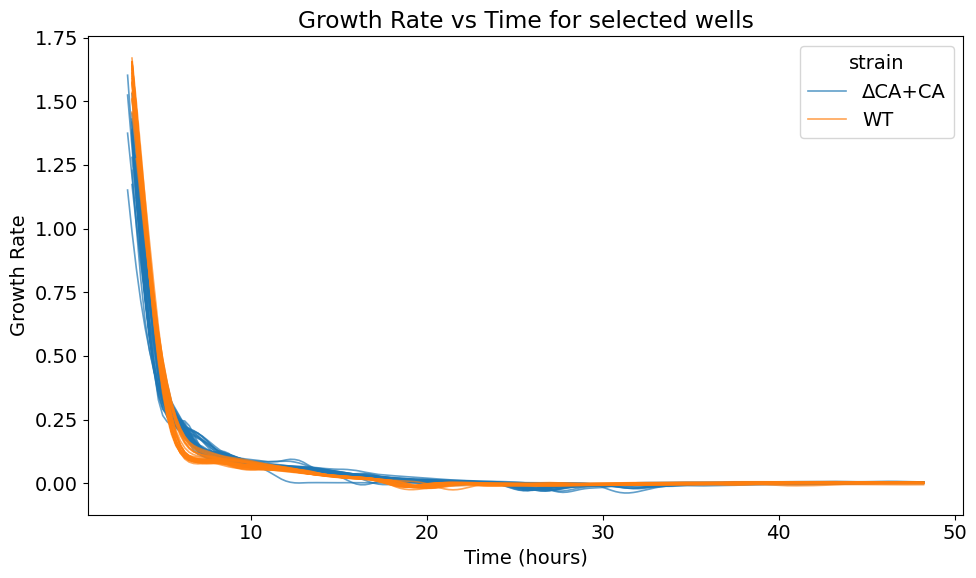

In [24]:
x_col = "time_hours"
y_col = "mu"
x_label = "Time (hours)"
y_label = "Growth Rate"
title = "Growth Rate vs Time for selected wells"
plot_helper(plot_by=plot_by, color_by=color_by, df=df, x_col=x_col, y_col=y_col, x_label=x_label, y_label=y_label, title= title)

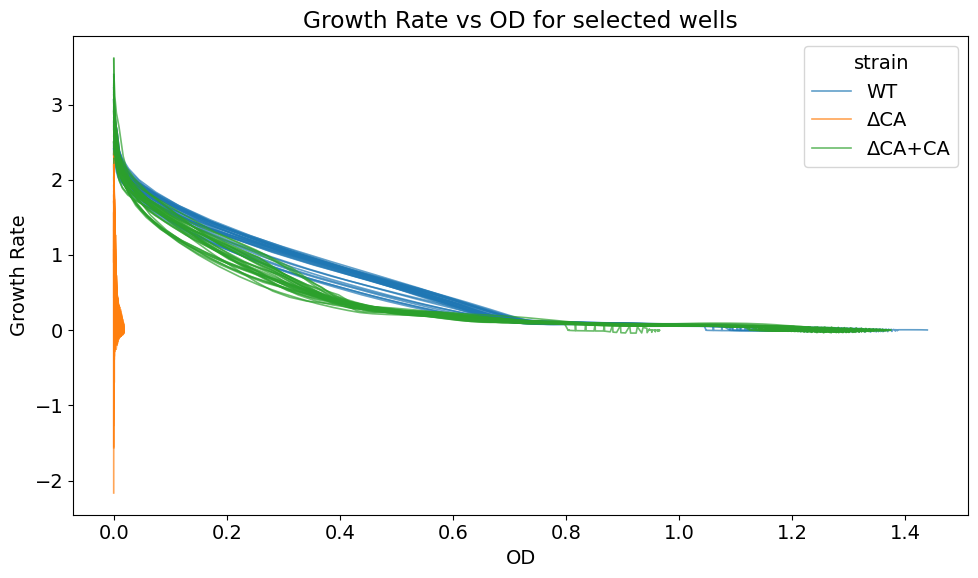

In [20]:
x_col = "od_smooth"
y_col = "mu"
x_label = "OD"
y_label = "Growth Rate"
title = "Growth Rate vs OD for selected wells"
plot_helper(plot_by=plot_by, color_by=color_by, df=df, x_col=x_col, y_col=y_col, x_label=x_label, y_label=y_label, title= title)

In [ ]:

plot_grouped(group_by="strain",
             df=with_mu,
             x_col="time_hours",
             y_col="od_smooth",
        xsplot_by=None, mode="overlay", agg="mean",
                 marker=None, log=False, font_size=14, ax=None)